In [2]:
# Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


### Consigna 3

Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una de las variables involucradas en el problema detallando características, comportamiento y rango de variación.

Debe incluir:
- Análisis y decisión sobre datos faltantes.
- Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)
- Codificación de variables categóricas (si se van a utilizar para predicción).
- Matriz de correlación de variables.
- Estandarización o escalado de datos.
- Validación cruzada train - test.

Realizar una división del conjunto de datos en conjuntos de entrenamiento y prueba (y si se quiere, se puede incluir validación, que luego será útil) en el MOMENTO donde ustedes lo crean adecuado.



The amount of missing data in each column
CRIM       23
ZN         22
INDUS      15
CHAS       23
NOX        24
RM         21
AGE        24
DIS        15
RAD        28
TAX        18
PTRATIO    28
B          22
LSTAT      22
MEDV       21
dtype: int64


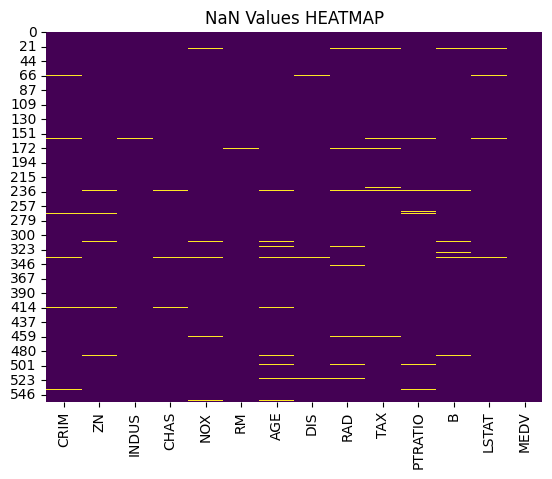

In [9]:
# Load the dataset
house_prices = pd.read_csv("./house-prices-tp.csv")

# Display the sum of missing values for each column
house_sum_null = house_prices.isnull().sum()
print('The amount of missing data in each column')
print(house_sum_null)

# Remove rows where the target column 'MEDV' contains NaN values
house_prices = house_prices.dropna(subset=['MEDV'])

# Visualize the remaining missing data as a heatmap
sns.heatmap(house_prices.isnull(), cbar=False, cmap='viridis')
plt.title('NaN Values HEATMAP')
plt.show()

In [10]:
'''
We separate the features (independent variables) from the target (dependent variable) as follows:
- X contains all the data except the column we want to predict (MEDV).
- y holds the values of the column to predict (MEDV).
'''
X = house_prices.drop('MEDV', axis=1)
y = house_prices['MEDV']

'''
Next, we split the dataset into training and testing sets:
- The data is split with 20% for testing and 80% for training.
- We use a random seed (random_state=42) to ensure reproducibility.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

HISTOGRAM



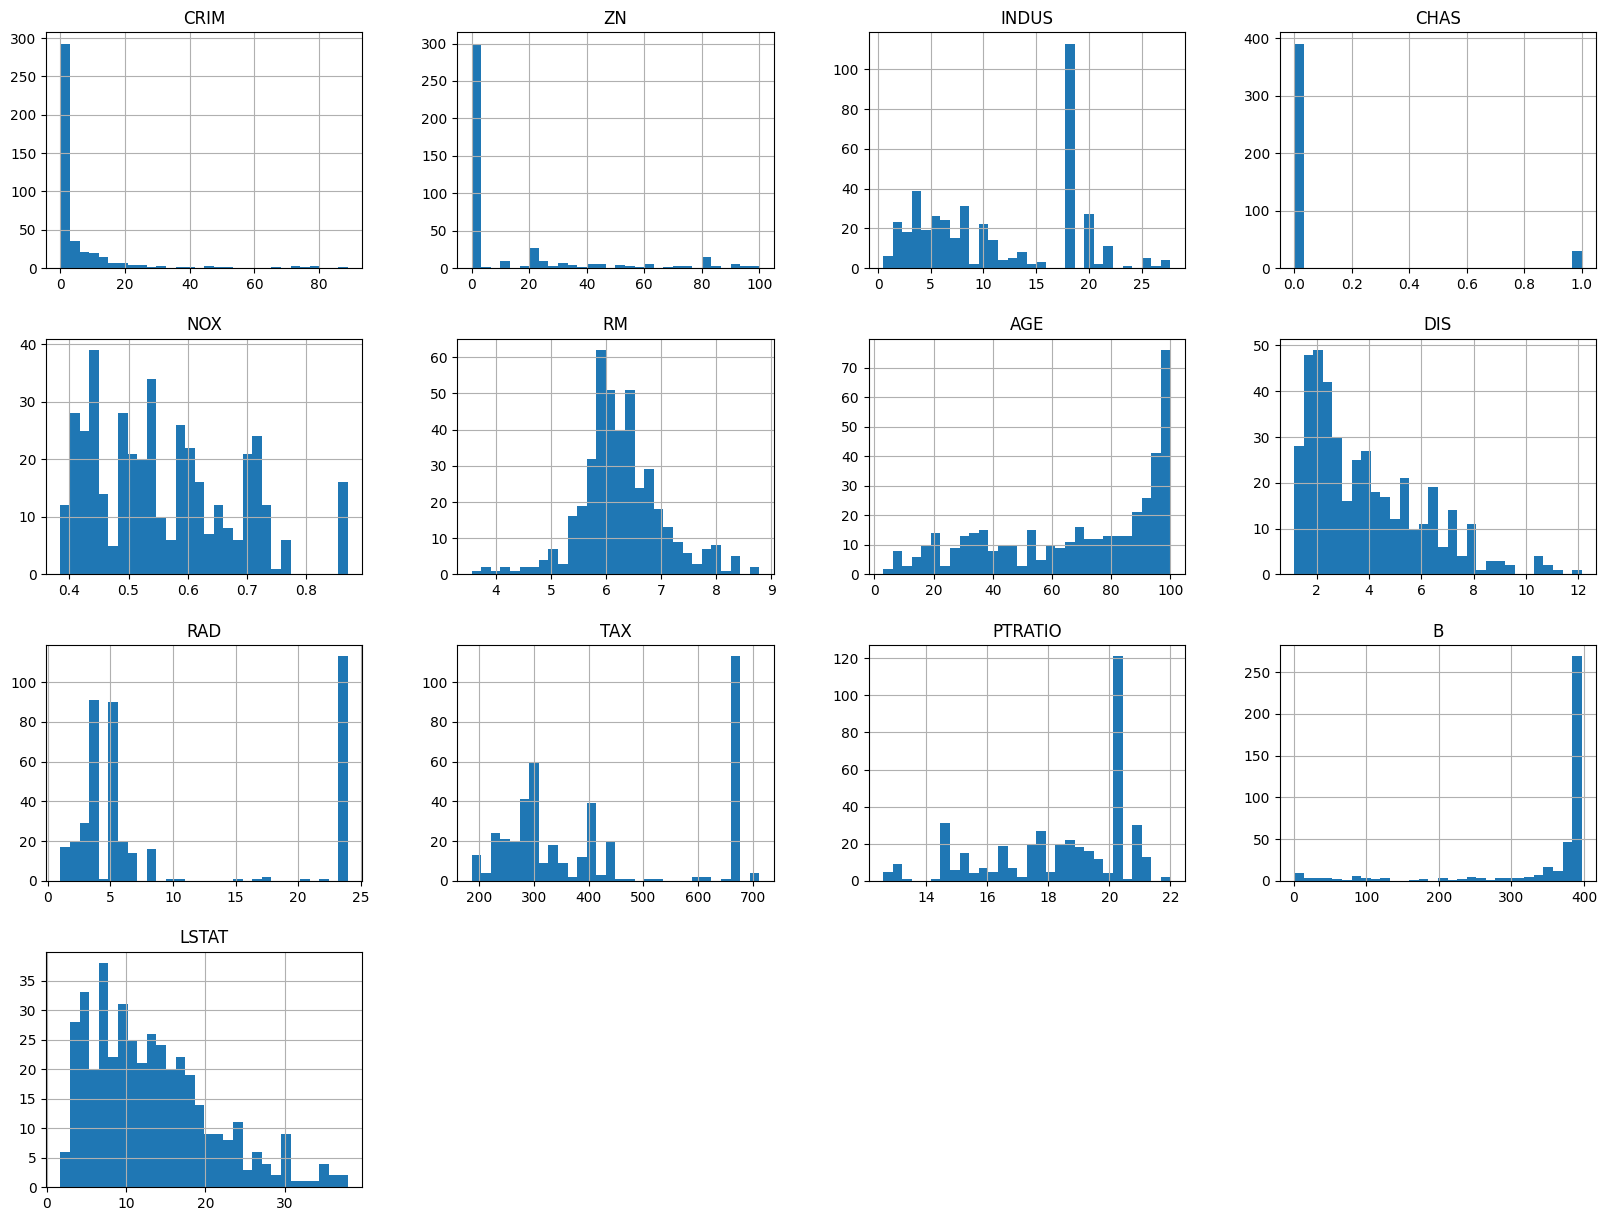


PAIRPLOT



/home/roberto-orazi/repositories/AA1-TUIA-Frattini-Gallardo-Orazi/AA1-TP1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roberto-orazi/repositories/AA1-TUIA-Frattini-Gallardo-Orazi/AA1-TP1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roberto-orazi/repositories/AA1-TUIA-Frattini-Gallardo-Orazi/AA1-TP1/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/roberto-orazi/repositories/AA1-TUIA-Frattini-G

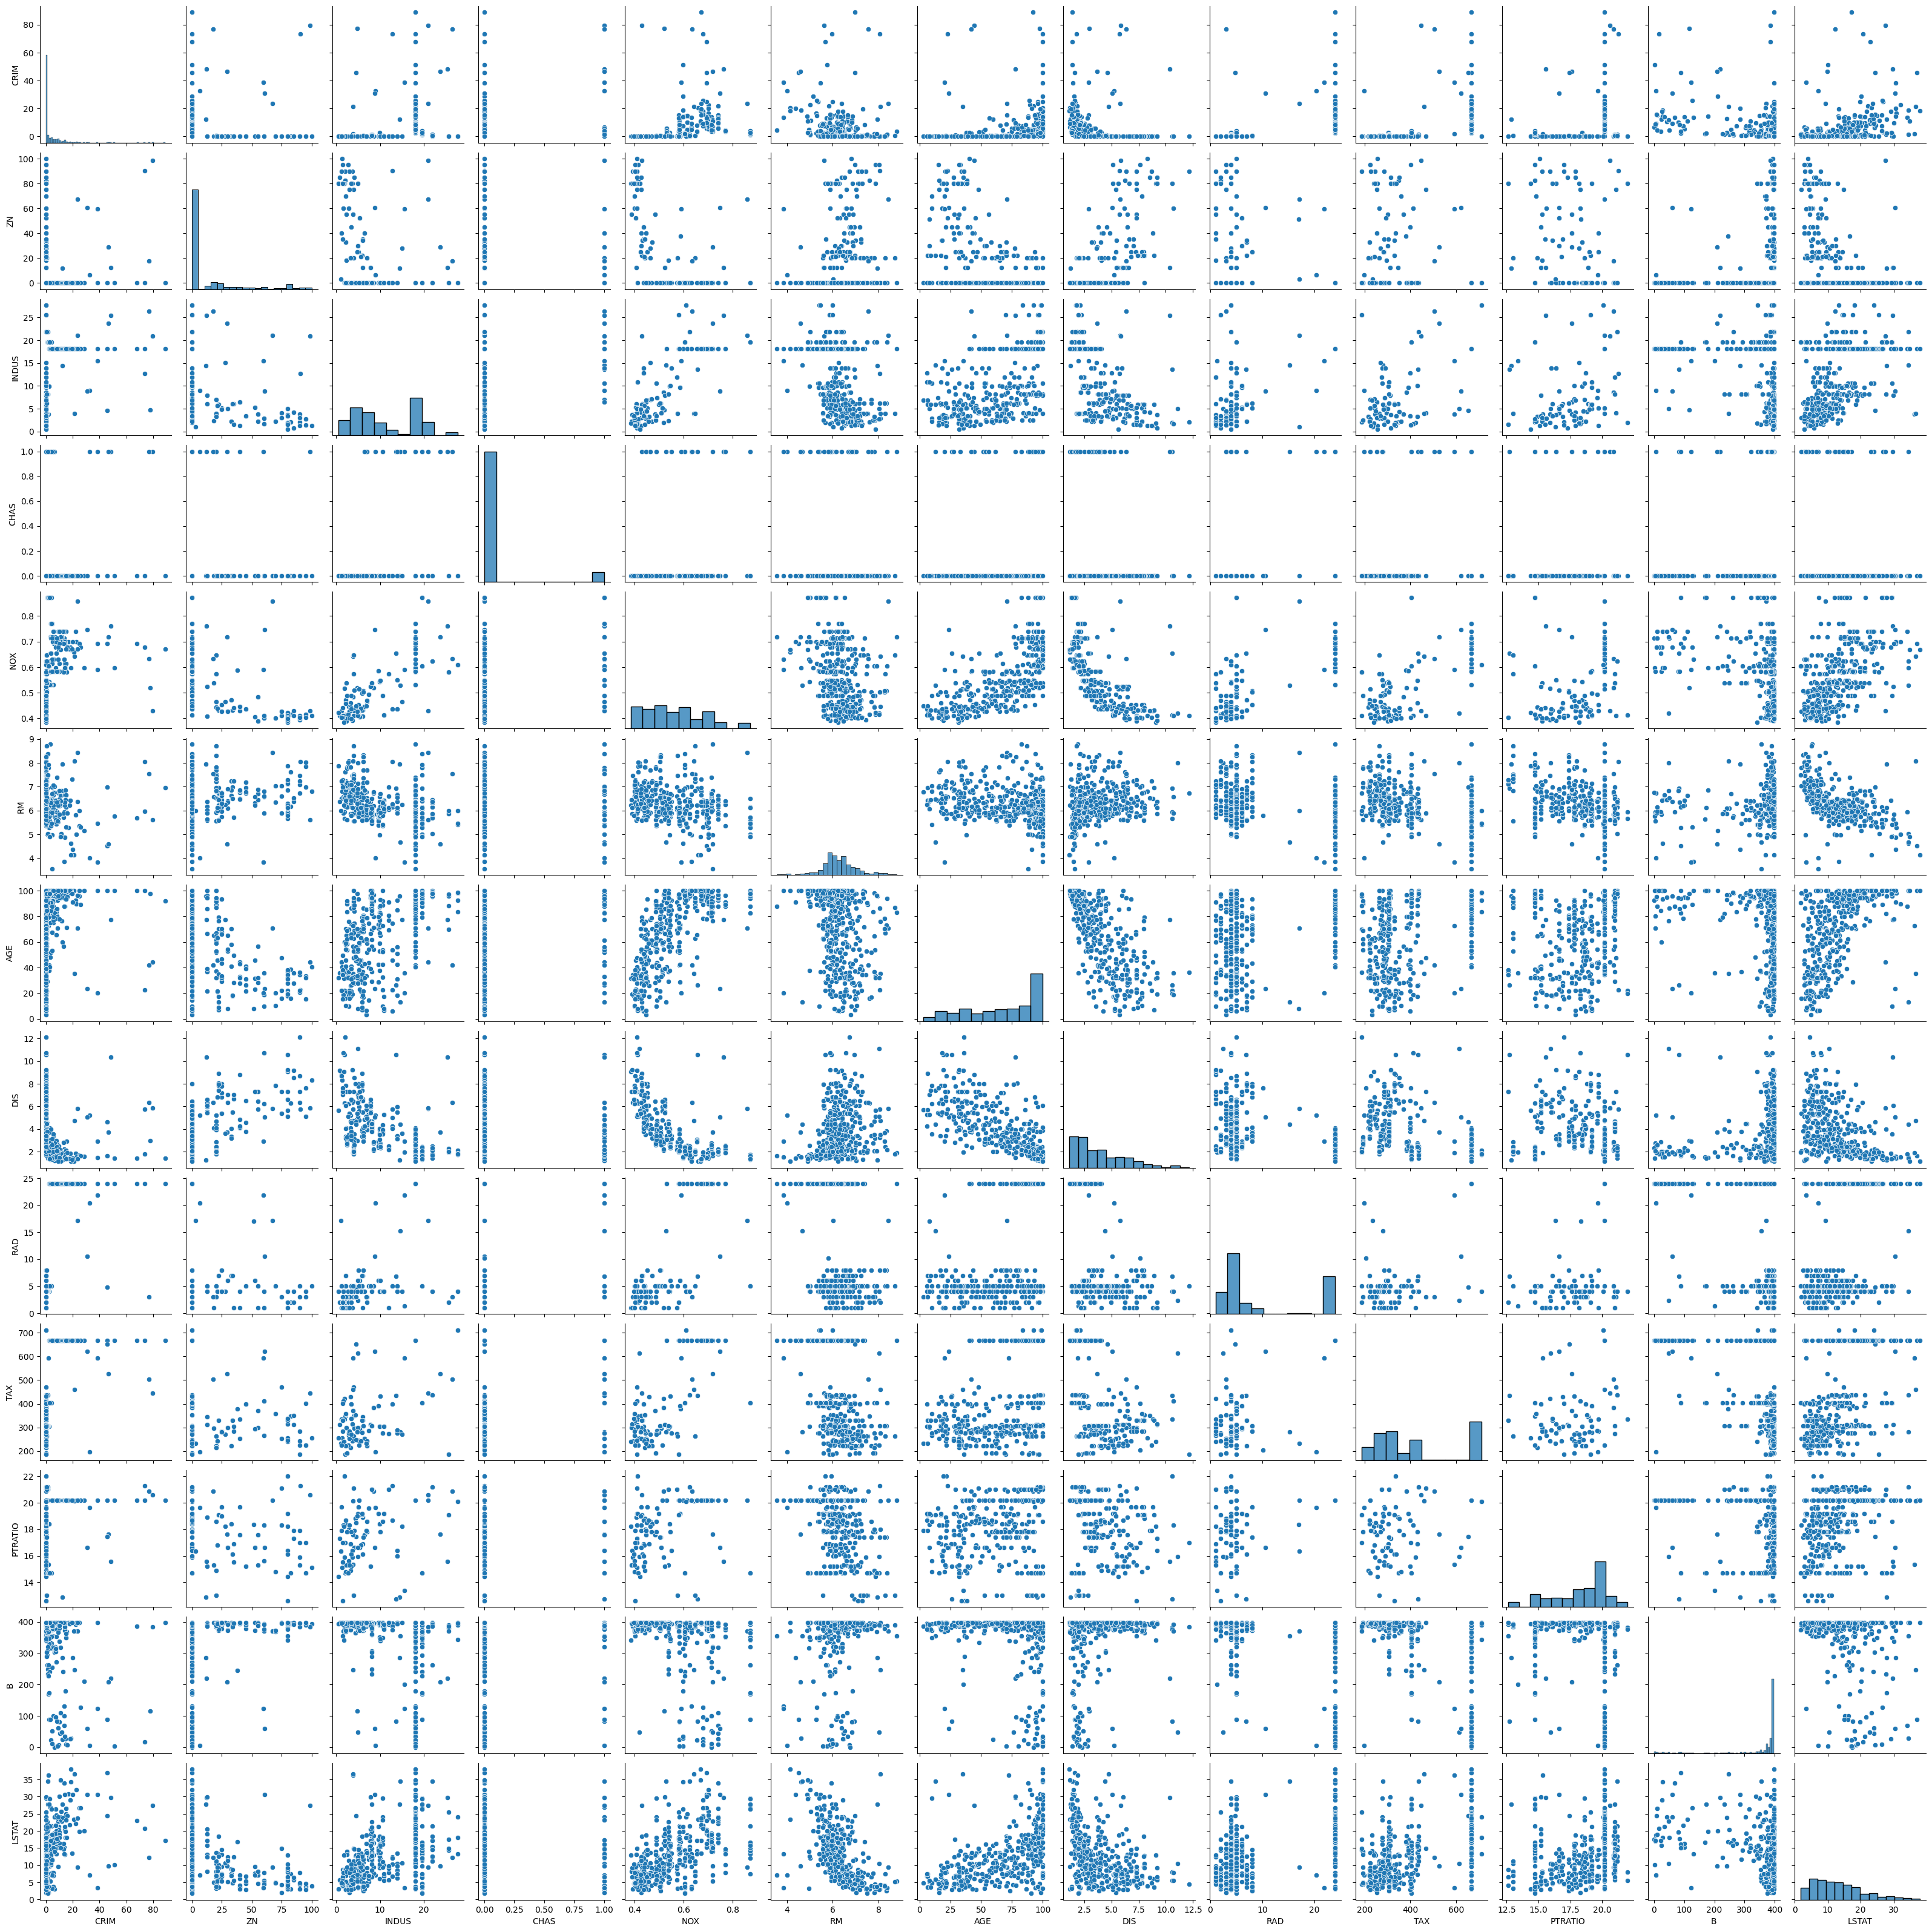


BOXPLOT



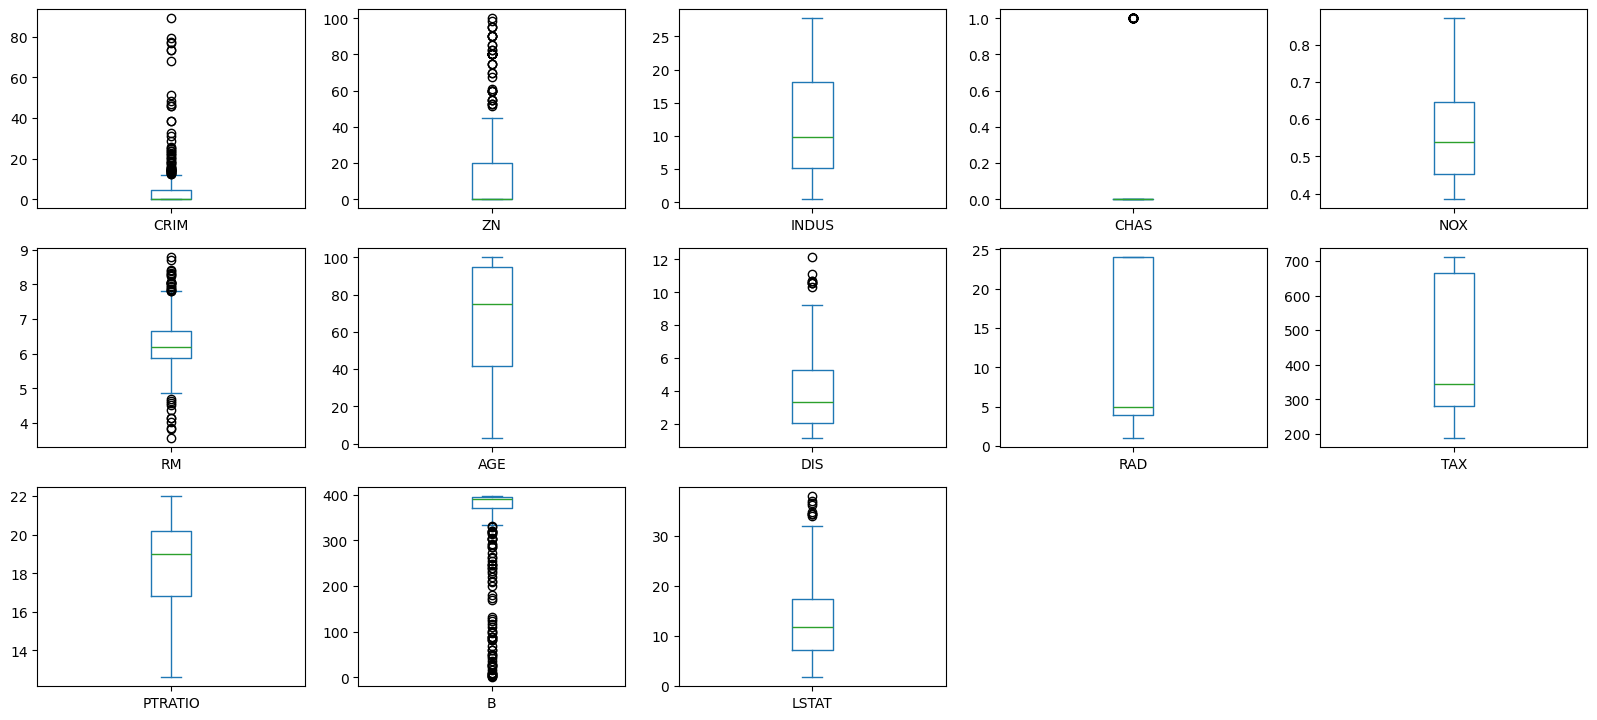

In [11]:
# Histograms for each variable except 'MEDV'
print('HISTOGRAM')
print('')
X_train.hist(bins=30, figsize=(20, 15))
plt.show()

# Pairplot to visualize relationships between variables, excluding 'MEDV'
print('')
print('PAIRPLOT')
print('')
sns.pairplot(X_train)
plt.show()

# Boxplots for each variable except 'MEDV'
print('')
print('BOXPLOT')
print('')
X_train.plot(kind='box', subplots=True, layout=(5,5), figsize=(20, 15))
plt.show()

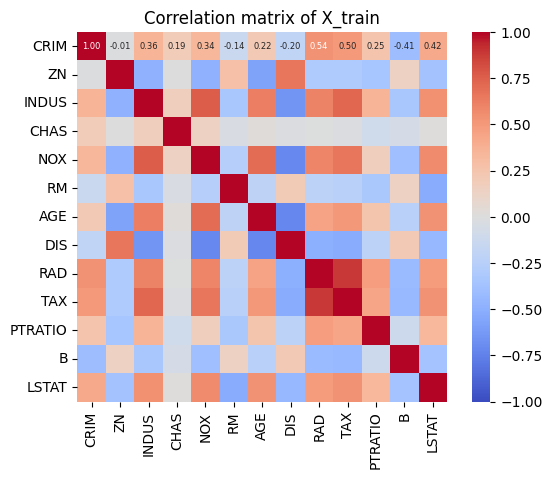

In [14]:
# Calculate the correlation matrix for the training set
corr_train = X_train.corr()
# Generate a heatmap to visualize the correlations in X_train
sns.heatmap(corr_train, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,square=True,fmt='.2f',annot_kws = {'size': 6})
plt.title('Correlation matrix of X_train')
plt.show()

In [ ]:
def mean_method(X_train=X_train,X_test=X_test):
  # Apply StandardScaler to normalize the data
  scaler = StandardScaler()
  X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
  X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

  # Impute missing values using the "mean" strategy with SimpleImputer
  imputer = SimpleImputer(strategy='mean')
  X_train_scaled = imputer.fit_transform(X_train_scaled)
  X_test_scaled = imputer.transform(X_test_scaled)

  return X_train_scaled , X_test_scaled

In [ ]:
def iterative_method(X_train=X_train,X_test=X_test):
  '''
  Imputation of missing values using the "Iterative Imputer Method"
  Note: This method might produce a convergence warning
  '''
  iterative_imputer = IterativeImputer()

  # Apply iterative imputation on training and testing sets
  X_train_imputed = iterative_imputer.fit_transform(X_train)
  X_test_imputed = iterative_imputer.transform(X_test)

  # Standardize the imputed data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_imputed)
  X_test_scaled = scaler.transform(X_test_imputed)
  return X_train_scaled , X_test_scaled

In [15]:
def KNN_method(X_train=X_train,X_test=X_test):
  # Imputation of missing values using the "KNN METHOD"
  knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

  # Apply KNN imputation
  X_train_imputed = knn_imputer.fit_transform(X_train)
  X_test_imputed = knn_imputer.transform(X_test)

  # Standardize the imputed data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train_imputed)
  X_test_scaled = scaler.transform(X_test_imputed)
  return X_train_scaled , X_test_scaled

In [ ]:
def mixed_method(X_train=X_train,X_test=X_test):
    '''
        Imputation of missing values using the "MIXED METHOD":
        SimpleImputer (mean, median, mode) and KNNImputer for different columns
    '''

    # Define the columns for each imputation strategy
    columns_mean = ['NOX', 'RM']
    columns_median = ['DIS', 'LSTAT']
    columns_mode = ['CRIM', 'ZN', 'CHAS','AGE', 'PTRATIO', 'B']
    columns_knn = ['INDUS', 'RAD', 'TAX']

    # Create imputers for different strategies
    imputer_mean = SimpleImputer(strategy='mean')
    imputer_median = SimpleImputer(strategy='median')
    imputer_mode = SimpleImputer(strategy='most_frequent')
    imputer_knn = KNNImputer(n_neighbors=5)

    # Define ColumnTransformer to apply different imputers to specific columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('mean', imputer_mean, columns_mean),
            ('median', imputer_median, columns_median),
            ('mode', imputer_mode, columns_mode),
            ('knn', imputer_knn, columns_knn)
        ],
        remainder='passthrough' # Leave other columns unchanged
    )

    # Create a pipeline that includes the preprocessor and a standard scaler
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
      ('scaler', StandardScaler())
    ])

    # Apply the pipeline to the training and test sets
    X_train_scaled = pipeline.fit_transform(X_train)
    X_test_scaled = pipeline.transform(X_test)
    return X_train_scaled , X_test_scaled

In [ ]:
X_train_scaled , X_test_scaled = mean_method()

In [ ]:
X_train_scaled , X_test_scaled = iterative_method()

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [16]:
X_train_scaled , X_test_scaled = KNN_method()

In [ ]:
X_train_scaled , X_test_scaled = mixed_method()

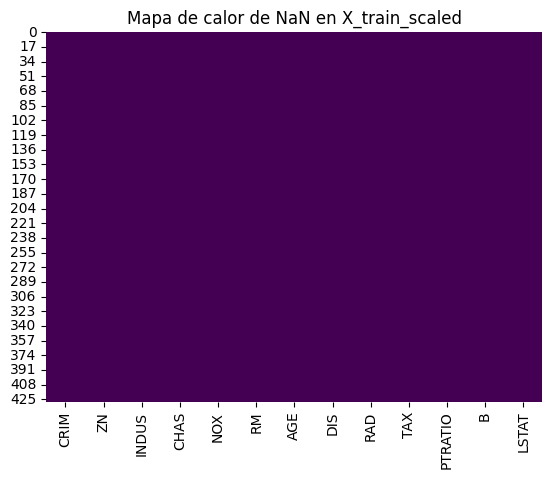

In [17]:
# Convert X_train_scaled back into a DataFrame with the original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Generate a heatmap to visualize any remaining NaN values after imputation
sns.heatmap(X_train_scaled_df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de NaN en X_train_scaled')
plt.show()

### Consigna 4
Implementar la solución del problema de regresión con regresión lineal múltiple.
- Probar con el método LinearRegression.
- Probar con métodos de gradiente descendiente. ¿Algún cambio? Incorporar gráficas de Error vs Iteraciones (loss vs epochs). Agregar comentarios.
- Probar con métodos de regularización (Lasso, Ridge, Elastic Net).
- Obtener las métricas adecuadas (entre R2 Score, MSE, RMSE, MAE, MAPE, elegir) tanto para entrenamiento como para prueba. ¿Por qué para ambos conjuntos?

¿Creen que han conseguido un buen fitting?

In [20]:
# Linear Regression model

# Linear Regression model creation
linear_model = LinearRegression()

# Training model
linear_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Calculate MSE manually
train_mse = np.mean((y_train - y_train_pred) ** 2)
test_mse = np.mean((y_test - y_test_pred) ** 2)

# Calculate R-squared metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
print(f'Train R²: {train_r2:.2f}, Test R²: {test_r2:.2f}')

# Obtain the coefficients of the model
coefficients = linear_model.coef_
intercept = linear_model.intercept_

print("Model coefficients:", coefficients)
print("Model intercept:", intercept)

Train MSE: 29.88, Test MSE: 53.38
Train R²: 0.67, Test R²: 0.36
Model coefficients: [ 0.33691499  1.74574883  0.19394627  1.74753352 -2.04622871  2.67731581
 -1.26550291 -4.12454684  1.43696124 -1.77539293 -1.9267819   0.58175029
 -3.54589665]
Model intercept: 22.578842017615816


In [21]:
# Creation of the SGDRegressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

# Training the model
sgd_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_sgd = sgd_model.predict(X_train_scaled)
y_test_pred_sgd = sgd_model.predict(X_test_scaled)

# Calculate MSE manually
train_mse_sgd = np.mean((y_train - y_train_pred_sgd) ** 2)
test_mse_sgd = np.mean((y_test - y_test_pred_sgd) ** 2)

# Calculate R² metrics
train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)

print(f'Train MSE (SGD): {train_mse_sgd:.2f}, Test MSE (SGD): {test_mse_sgd:.2f}')
print(f'Train R² (SGD): {train_r2_sgd:.2f}, Test R² (SGD): {test_r2_sgd:.2f}')

# Obtain the coefficients of the model
coefficients = sgd_model.coef_
intercept = sgd_model.intercept_

print("Model coefficients:", coefficients)
print("Model intercept:", intercept)

Train MSE (SGD): 30.03, Test MSE (SGD): 53.11
Train R² (SGD): 0.67, Test R² (SGD): 0.36
Model coefficients: [ 0.30262363  1.6354513  -0.06615049  1.82001363 -1.87043197  2.67496043
 -1.30815009 -3.90809457  0.99843792 -1.33763557 -1.92517293  0.66594389
 -3.62556577]
Model intercept: [22.57833153]


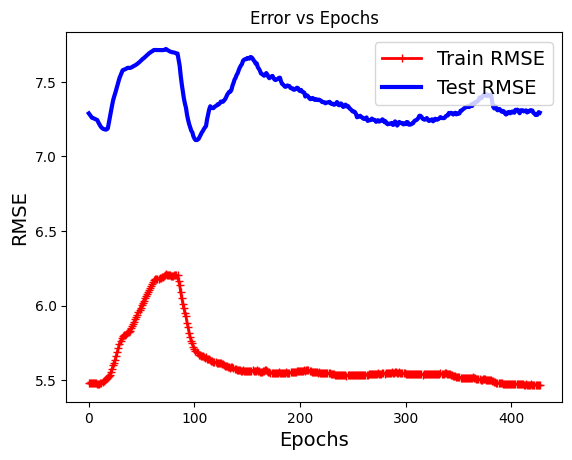

In [22]:
# Initialize lists to store training and testing errors
train_errors, test_errors = [], []

# Iterate through different sizes of training data
for m in range(1, len(X_train_scaled) + 1):  # Ensure inclusive range
    sgd_model.partial_fit(X_train_scaled[:m], y_train[:m])
    y_train_predict = sgd_model.predict(X_train_scaled)
    y_test_predict = sgd_model.predict(X_test_scaled)
    
    # Manually calculate mean squared error
    train_mse = np.mean((y_train - y_train_predict) ** 2)
    test_mse = np.mean((y_test - y_test_predict) ** 2)
    
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plotting RMSE for training and testing errors
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train RMSE")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("Error vs Epochs")
plt.show()


In [ ]:
"""
We can see that the coefficients of both models are very similar.
This indicates that the models fit almost equally well and also in the error vs iterations
graph the value in few iterations has the same value that converges with increasing epochs,
so a downward gradient converges to almost the same result as the regression model.
"""

In [23]:
# Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)
coefficients_lasso = lasso_model.coef_
intercept_lasso = lasso_model.intercept_

# Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_train_pred_ridge = ridge_model.predict(X_train_scaled)
y_test_pred_ridge = ridge_model.predict(X_test_scaled)
coefficients_ridge = ridge_model.coef_
intercept_ridge = ridge_model.intercept_

# Elastic Net
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)
y_train_pred_elastic = elastic_model.predict(X_train_scaled)
y_test_pred_elastic = elastic_model.predict(X_test_scaled)
coefficients_elastic = elastic_model.coef_
intercept_elastic = elastic_model.intercept_

# Metrics
models = {
    "Lasso": (y_train_pred_lasso, y_test_pred_lasso, coefficients_lasso, intercept_lasso),
    "Ridge": (y_train_pred_ridge, y_test_pred_ridge, coefficients_ridge, intercept_ridge),
    "ElasticNet": (y_train_pred_elastic, y_test_pred_elastic, coefficients_elastic, intercept_elastic)
}

for name, (y_train_pred, y_test_pred, coefficients, intercept) in models.items():
    # Manually calculate mean squared error
    train_mse = np.mean((y_train - y_train_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)

    # Calculate R2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"{name} Model coefficients:", coefficients)
    print(f"{name} Model intercept:", intercept)
    print(f'{name} - Train MSE: {train_mse}, Test MSE: {test_mse}')
    print(f'{name} - Train R2: {train_r2}, Test R2: {test_r2}')
    print("")


Lasso Model coefficients: [ 0.17870058  1.52839271 -0.          1.69720937 -1.69849936  2.63382668
 -1.0989817  -3.59432251  0.49893637 -0.86552375 -1.77172455  0.44903556
 -3.5655464 ]
Lasso Model intercept: 22.578842017615816
Lasso - Train MSE: 30.234369853293614, Test MSE: 52.05284171708981
Lasso - Train R2: 0.6694435916977818, Test R2: 0.37415237808117896

Ridge Model coefficients: [ 0.33490185  1.72945529  0.17665572  1.74544585 -2.02125514  2.67572107
 -1.25931533 -4.08764731  1.40147799 -1.73697667 -1.92140457  0.58402275
 -3.53958237]
Ridge Model intercept: 22.578842017615816
Ridge - Train MSE: 29.884774008611455, Test MSE: 53.160156085462575
Ridge - Train R2: 0.6732657698128295, Test R2: 0.36083879055546453

ElasticNet Model coefficients: [ 0.20687176  1.39409701 -0.03208619  1.65117121 -1.51158817  2.63172636
 -1.084734   -3.2221459   0.60932804 -0.97953101 -1.77406896  0.5495995
 -3.38921461]
ElasticNet Model intercept: 22.578842017615816
ElasticNet - Train MSE: 30.423196463

Having a Train/Test of 80/20 we see that the R2 of Train is "High" so we do not consider that there is underfitting.
However, the R2 of train is greater than the R2 of test
and MSE of train is lower than MSE of train which would indicate that there is OVERFITTING.

So in conclusion we think we don't have a good fitting

To solve this, we again went back to the beginning and tried smaller Train size values (manually).
We observed that doing a 50/50 crosstrain was a much better fit than the initial 80/20.

In [24]:
def print_metrics(y_true, y_pred, dataset_type):
    """
    Calculate and print regression evaluation metrics.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - dataset_type: str, type of dataset (e.g., 'Train' or 'Test') for labeling output

    Metrics Calculated:
    - MSE: Mean Squared Error
    - RMSE: Root Mean Squared Error
    - MAE: Mean Absolute Error
    - R²: Coefficient of Determination
    """

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((y_true - y_pred) ** 2)  # Measures average squared difference between actual and predicted values

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)  # Provides the square root of the average squared differences, in the same unit as the target variable

    # Calculate Mean Absolute Error (MAE)
    mae = np.mean(np.abs(y_true - y_pred))  # Measures the average magnitude of errors in a set of predictions, without considering their direction

    # Calculate R² Score (Coefficient of Determination)
    r2 = r2_score(y_true, y_pred)  # Indicates how well the predicted values approximate the actual values, ranges from 0 to 1

    # Print the calculated metrics for the specified dataset
    print(f'{dataset_type} - MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')

# Print metrics for the training dataset
print_metrics(y_train, y_train_pred, 'Train')

# Print metrics for the test dataset
print_metrics(y_test, y_test_pred, 'Test')



Train - MSE: 30.423196463779558, RMSE: 5.51572266015792, MAE: 3.769791957338217, R2: 0.6673791251169672
Test - MSE: 48.9125551731346, RMSE: 6.993751151787902, MAE: 4.384825968261768, R2: 0.41190902691813935


In [ ]:
# Definition of the Stochastic Gradient Descent (SGD) regression model
sgd = SGDRegressor()

# Hyperparameter grid for optimizing the SGD model
param_grid_sgd = {
    'alpha': np.logspace(-4, 2, num=7),  # Generate 7 values from 0.0001 to 100
    'max_iter': [1000, 2000, 3000],  # Maximum number of iterations for the solver
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria
}

# Configuration of GridSearchCV to find the best hyperparameters using cross-validation
grid_search_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5, scoring='neg_mean_squared_error')

# Model training with the training dataset
grid_search_sgd.fit(X_train_scaled, y_train)

# Output the best hyperparameters found by GridSearchCV
print("Best hyperparameters for SGD:", grid_search_sgd.best_params_)

# Evaluation of the model with the best hyperparameters
best_sgd = grid_search_sgd.best_estimator_  # Retrieve the best model
y_train_pred_best_sgd = best_sgd.predict(X_train_scaled)  # Predictions on the training data
y_test_pred_best_sgd = best_sgd.predict(X_test_scaled)  # Predictions on the test data

# Print metrics for the optimized SGD model on training data
print_metrics(y_train, y_train_pred_best_sgd, 'Train (SGD Optimized)')

# Print metrics for the optimized SGD model on test data
print_metrics(y_test, y_test_pred_best_sgd, 'Test (SGD Optimized)')


Best hyperparameters for SGD: {'alpha': 0.1, 'max_iter': 1000, 'tol': 0.0001}
Train (SGD Optimized) - MSE: 34.45723139754201, RMSE: 5.870028228002146, MAE: 3.9650842764398444, R2: 0.6436127035882118
Test (SGD Optimized) - MSE: 35.25710267991471, RMSE: 5.937769166944325, MAE: 4.07362133971016, R2: 0.5678452108520458


In [26]:
# Model definition for Lasso regression
lasso = Lasso()

# Hyperparameter grid for Lasso regression using a logarithmic scale
param_grid_lasso = {
    'alpha': np.logspace(-4, 2, num=7)  # Generate 7 values from 0.0001 to 100
}

# Configuration of GridSearchCV to optimize hyperparameters using cross-validation
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Model training with the training dataset
grid_search_lasso.fit(X_train_scaled, y_train)

# Output the best hyperparameters found by GridSearchCV
print("Best hyperparameters for Lasso:", grid_search_lasso.best_params_)

# Evaluation of the model with the best hyperparameters
best_lasso = grid_search_lasso.best_estimator_  # Retrieve the best model
y_train_pred_best_lasso = best_lasso.predict(X_train_scaled)  # Predictions on the training data
y_test_pred_best_lasso = best_lasso.predict(X_test_scaled)  # Predictions on the test data

# Print metrics for the optimized Lasso model on training data
print_metrics(y_train, y_train_pred_best_lasso, 'Train (Lasso Optimized)')

# Print metrics for the optimized Lasso model on test data
print_metrics(y_test, y_test_pred_best_lasso, 'Test (Lasso Optimized)')


Best hyperparameters for Lasso: {'alpha': 0.01}
Train (Lasso Optimized) - MSE: 29.889013945420157, RMSE: 5.467084592853869, MAE: 3.786621906376414, R2: 0.6732194140167698
Test (Lasso Optimized) - MSE: 53.240316879061446, RMSE: 7.296596252984089, MAE: 4.582794254373483, R2: 0.3598749922230383


In [27]:
# Model definition for Ridge regression
ridge = Ridge()

# Hyperparameter grid for Ridge regression using a logarithmic scale
param_grid_ridge = {
    'alpha': np.logspace(-4, 2, num=7)  # Generate 7 values from 0.0001 to 100
}

# Configuration of GridSearchCV to find the best hyperparameters using cross-validation
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Model training with the training dataset
grid_search_ridge.fit(X_train_scaled, y_train)

# Output the best hyperparameters found by GridSearchCV
print("Best hyperparameters for Ridge:", grid_search_ridge.best_params_)

# Evaluation of the model with the best hyperparameters
best_ridge = grid_search_ridge.best_estimator_  # Retrieve the best model
y_train_pred_best_ridge = best_ridge.predict(X_train_scaled)  # Predictions on training data
y_test_pred_best_ridge = best_ridge.predict(X_test_scaled)  # Predictions on test data

# Print metrics for the optimized Ridge model on training data
print_metrics(y_train, y_train_pred_best_ridge, 'Train (Ridge Optimized)')

# Print metrics for the optimized Ridge model on test data
print_metrics(y_test, y_test_pred_best_ridge, 'Test (Ridge Optimized)')



Best hyperparameters for Ridge: {'alpha': 10.0}
Train (Ridge Optimized) - MSE: 29.958675587846546, RMSE: 5.473451889607375, MAE: 3.7700158974296136, R2: 0.6724577939655288
Test (Ridge Optimized) - MSE: 51.34931607928619, RMSE: 7.165843710219069, MAE: 4.490570137590551, R2: 0.3826110872093256


We note that the optimisation of the hyperparameters did not show significant changes with respect to the first results.
Both for downward gradient and for Lasso and Ridge.

In [ ]:
"""
Train (SGD Optimized) - MSE: 34.45723139754201, RMSE: 5.870028228002146, MAE: 3.9650842764398444, R2: 0.6436127035882118
Test (SGD Optimized) - MSE: 35.25710267991471, RMSE: 5.937769166944325, MAE: 4.07362133971016, R2: 0.5678452108520458

Train (Lasso Optimized) - MSE: 33.85868917128141, RMSE: 5.818821974530705, MAE: 3.9851223584697917, R2: 0.6498033589935828
Test (Lasso Optimized) - MSE: 37.33495340584962, RMSE: 6.11023349847202, MAE: 4.192290829913602, R2: 0.5423764946475556

Train (Ridge Optimized) - MSE: 33.45246892964561, RMSE: 5.783810934811546, MAE: 3.9494411668817837, R2: 0.6540048495890998
Test (Ridge Optimized) - MSE: 38.09118587574621, RMSE: 6.171805722456453, MAE: 4.144693973672924, R2: 0.5331071713414979

Taking into account the metrics:

MSE, SGD is the best because it has lower test values than the other two methods.
RMSE, is the same that in MSE, so SGD is also the best method with this metric.
MAE, SGD also has the lowest MAE values in the test, which indicates that it is closer to the real values.
R2, All have similar R2 values in train, but in Test the R2 of SGD is the highest, so it is the best performing.

We conclude that the best fitting regression model in this dataset is the SGD model.
"""

In [ ]:
"""
Conclusions:

The model does not fit perfectly well,
we believe this is mainly because the relationships of the variables with the variable to be predicted are not linearly dependent.

This model could be improved by taking into account that the relationships between the variables may have non-linear models,
so we could perform transformations on the variables that have another type of dependence and thus adjust it with a linear model.

We also considered that this dataset is large enough that we could not do the standard 80/20 ratio,
 as this would cause overfitting, so by adjusting by hand, the best training values we obtained were using a 50/50 ratio.
"""